<a href="https://colab.research.google.com/github/ansiu311/gitto.github.io/blob/main/%EC%BC%80%EC%B0%BD%EB%94%A53%EC%9E%A5_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8(%EC%95%88%EC%8B%9C%EC%9A%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

# 케라스와 텐서플로 소개

## 텐서플로란?

## 케라스란?

## 텐서플로 시작하기

#### 상수 텐서와 변수

**모두 1 또는 모두 0인 텐서**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**랜덤 텐서**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.7505509 ]
 [ 0.24936041]
 [-0.817007  ]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.79293656]
 [0.15711284]
 [0.9184731 ]], shape=(3, 1), dtype=float32)


**넘파이 배열에 값 할당하기**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**텐서플로 변수 만들기**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.0025804 ],
       [-0.07475293],
       [-1.2685179 ]], dtype=float32)>


**텐서플로 변수에 값 할당하기**

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**변수 일부에 값 할당하기**

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**`assign_add` 사용하기**

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 텐서 연산: 텐서플로에서 수학 계산하기

**기본적인 수학 연산**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### GradientTape API 다시 살펴 보기

**`GradientTape` 사용하기**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**상수 입력 텐서와 함께 `GradientTape` 사용하기**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### 엔드-투-엔드 예제: 텐서플로 선형 분류기

**2D 평면에 두 클래스의 랜덤한 포인트 생성하기**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**두 클래스를 (2000, 2) 크기의 한 배열로 쌓기**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**(0과 1로 구성된) 타깃 생성하기**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**두 클래스의 포인트를 그래프로 그리기**

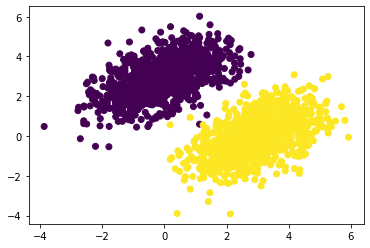

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**선형 분류기의 변수 만들기**

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**정방향 패스 함수**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**평균 제곱 오차 손실 함수**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**훈련 스텝 함수**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**배치 훈련 루프**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 3.9929
1번째 스텝의 손실: 0.5241
2번째 스텝의 손실: 0.1887
3번째 스텝의 손실: 0.1464
4번째 스텝의 손실: 0.1327
5번째 스텝의 손실: 0.1227
6번째 스텝의 손실: 0.1138
7번째 스텝의 손실: 0.1057
8번째 스텝의 손실: 0.0984
9번째 스텝의 손실: 0.0917
10번째 스텝의 손실: 0.0857
11번째 스텝의 손실: 0.0802
12번째 스텝의 손실: 0.0752
13번째 스텝의 손실: 0.0706
14번째 스텝의 손실: 0.0665
15번째 스텝의 손실: 0.0628
16번째 스텝의 손실: 0.0593
17번째 스텝의 손실: 0.0563
18번째 스텝의 손실: 0.0534
19번째 스텝의 손실: 0.0509
20번째 스텝의 손실: 0.0486
21번째 스텝의 손실: 0.0464
22번째 스텝의 손실: 0.0445
23번째 스텝의 손실: 0.0428
24번째 스텝의 손실: 0.0412
25번째 스텝의 손실: 0.0398
26번째 스텝의 손실: 0.0384
27번째 스텝의 손실: 0.0373
28번째 스텝의 손실: 0.0362
29번째 스텝의 손실: 0.0352
30번째 스텝의 손실: 0.0343
31번째 스텝의 손실: 0.0335
32번째 스텝의 손실: 0.0328
33번째 스텝의 손실: 0.0321
34번째 스텝의 손실: 0.0315
35번째 스텝의 손실: 0.0309
36번째 스텝의 손실: 0.0304
37번째 스텝의 손실: 0.0300
38번째 스텝의 손실: 0.0295
39번째 스텝의 손실: 0.0292


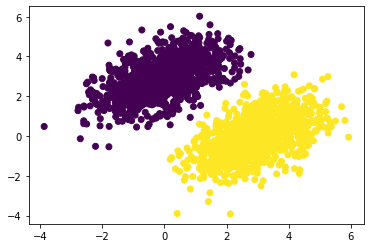

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

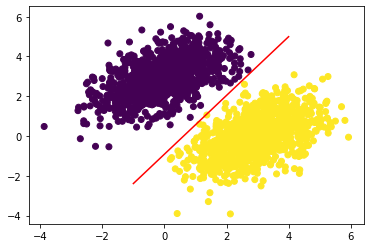

In [ ]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## 신경망의 구조: 핵심 Keras API 이해하기

### 층: 딥러닝의 구성 요소

#### 케라스의 Layer 클래스

**`Layer`의 서브클래스로 구현한 `Dense` 층**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 자동 크기 추론: 동적으로 층 만들기

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### 층에서 모델로

### “컴파일” 단계: 학습 과정 설정

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 손실 함수 선택하기

### fit() 메서드 이해하기

**넘파이 데이터로 `fit()` 메서드 호출하기**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 2s 6ms/step - loss: 0.7134 - binary_accuracy: 0.8260
Epoch 2/5
16/16 [==============================] - 0s 8ms/step - loss: 0.6101 - binary_accuracy: 0.8655
Epoch 3/5
16/16 [==============================] - 0s 11ms/step - loss: 0.5318 - binary_accuracy: 0.8960
Epoch 4/5
16/16 [==============================] - 0s 6ms/step - loss: 0.4638 - binary_accuracy: 0.9245
Epoch 5/5
16/16 [==============================] - 0s 6ms/step - loss: 0.4038 - binary_accuracy: 0.9480


In [ ]:
history.history

{'loss': [0.713449239730835,
  0.6100715398788452,
  0.5317538976669312,
  0.46384885907173157,
  0.40376561880111694],
 'binary_accuracy': [0.8259999752044678,
  0.8654999732971191,
  0.8960000276565552,
  0.9244999885559082,
  0.9480000138282776]}

### 검증 데이터에서 손실과 측정 지표 모니터링하기

**`validation_data` 매개변수 사용하기**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 3s 20ms/step - loss: 0.4103 - binary_accuracy: 0.8571 - val_loss: 0.0275 - val_binary_accuracy: 1.0000
Epoch 2/5
88/88 [==============================] - 1s 11ms/step - loss: 0.0680 - binary_accuracy: 0.9564 - val_loss: 0.1068 - val_binary_accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 1s 13ms/step - loss: 0.0737 - binary_accuracy: 0.9593 - val_loss: 0.0855 - val_binary_accuracy: 0.9417
Epoch 4/5
88/88 [==============================] - 1s 11ms/step - loss: 0.0711 - binary_accuracy: 0.9550 - val_loss: 0.0857 - val_binary_accuracy: 0.9383
Epoch 5/5
88/88 [==============================] - 1s 10ms/step - loss: 0.0779 - binary_accuracy: 0.9471 - val_loss: 0.0315 - val_binary_accuracy: 0.9933


### 추론: 훈련한 모델 사용하기

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 5ms/step
[[1.2593105 ]
 [1.067817  ]
 [0.08916157]
 [0.90747017]
 [0.00178897]
 [0.15578756]
 [0.17157307]
 [0.14875671]
 [1.1115632 ]
 [0.03826606]]
